In [2]:
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import dataframePreparation as u
import seaborn as sns

#link : "https://raw.githubusercontent.com/greysonchung/New-York-Taxi-Data-Analysis/main/code/visualisation.ipynb"

In [3]:
yellow_results_df = u.preprocess_data("m6nq-qud6")
#green_results_df =u.preprocess_data("w7fs-fd9i")

In [4]:
# Identify pickup and dropoff borough
def drop_pick_data(frame):
    zone_df = pd.read_csv('taxi+_zone_lookup.csv')
    zone_df.info()
    data = pd.DataFrame(pd.merge(frame, zone_df[['LocationID', 'Borough']], left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
    data = data.rename({'Borough':'PUborough'}, axis=1)
    data = pd.DataFrame(pd.merge(data, zone_df[['LocationID', 'Borough']], left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
    data = data.rename({'Borough':'DOborough'}, axis=1)
    return data
yellow_drop_pick_data= drop_pick_data(yellow_results_df)
#green_drop_pick_data= drop_pick_data(green_results_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [5]:
yellow_drop_pick_data
borough_count = yellow_drop_pick_data.groupby('PUborough').agg('count').reset_index()
borough_count

,PUborough,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,DOborough
0,Bronx,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660,2660
1,Brooklyn,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692,5692
2,EWR,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
3,Manhattan,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305,931305
4,Queens,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204,52204
5,Staten Island,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
6,Unknown,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884


In [6]:
borough_count_drop = yellow_drop_pick_data.groupby('DOborough').agg('count').reset_index()
borough_count_drop

,DOborough,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PUborough
0,Bronx,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528
1,Brooklyn,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002,33002
2,EWR,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491
3,Manhattan,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668,909668
4,Queens,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205,34205
5,Staten Island,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471
6,Unknown,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635,9635


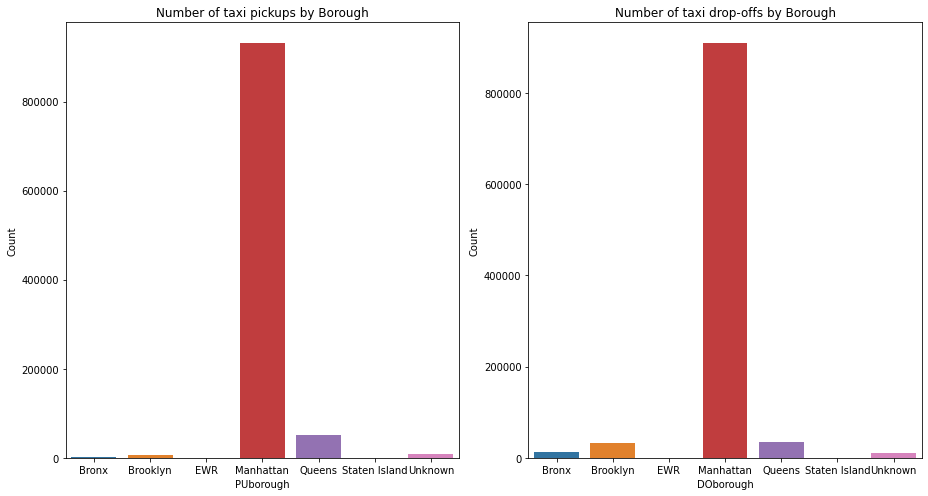

In [7]:
import seaborn as sns

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,7))

sns.barplot(x='PUborough', y='vendorid', data=borough_count,ax=ax[0])
ax[0].set_title('Number of taxi pickups by Borough')
ax[0].set_xlabel('PUborough')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='both',labelsize=10)

sns.barplot(x='DOborough', y='vendorid', data=borough_count_drop,ax=ax[1])
ax[1].set_title('Number of taxi drop-offs by Borough')
ax[1].set_xlabel('DOborough')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='both',labelsize=10)

plt.tight_layout()



In [8]:
def read_gdf():
    countries_gdf = gpd.read_file('taxi_zones/taxi_zones.shp')
    zone = pd.read_csv('taxi+_zone_lookup.csv')
    countries_gdf['geometry'] = countries_gdf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
    return countries_gdf

In [9]:
def pu_zone(frame):
    pu_zone = frame.groupby(['pulocationid'], as_index=False).size()
    pu_zone = gpd.GeoDataFrame(pd.merge(pu_zone, read_gdf(), left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
    pu_zone = pu_zone.to_crs(epsg=3857)
    return pu_zone
def do_data(frame):
    do_zone = frame.groupby(['dolocationid'], as_index=False).size()
    do_zone = gpd.GeoDataFrame(pd.merge(do_zone, read_gdf(), left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
    do_zone = do_zone.to_crs(epsg=3857)
    return do_zone


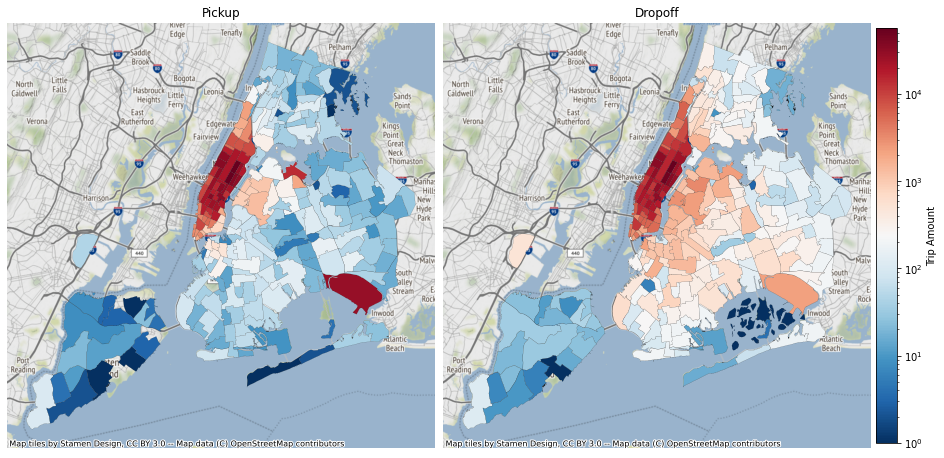

In [10]:
do_yellow_df= do_data(yellow_drop_pick_data)
pu_yellow_df= pu_zone(yellow_drop_pick_data)

# plot geospatial visualisation to compare pickup and dropoff amount from each zone
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)
# create a normalized colorbar
vmin, vmax = pu_yellow_df['size'].min(), pu_yellow_df['size'].max()
axs[0] = pu_yellow_df.plot(column='size', linewidth=0.09, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='RdBu_r', legend=False, ax=axs[0]) 
ctx.add_basemap(axs[0])
vmin, vmax = do_yellow_df['size'].min(), do_yellow_df['size'].max()
axs[1] = do_yellow_df.plot(column='size', linewidth=0.1, edgecolor='k', figsize=(10, 10),
    norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='RdBu_r', legend=False, ax=axs[1])
ctx.add_basemap(axs[1])
axs[0].set_title('Pickup')
axs[1].set_title('Dropoff')
axs[0].set_axis_off()
axs[1].set_axis_off()
# draw the color bar
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('Trip Amount')
plt.show()

In [11]:
do_yellow_df.sort_values(by=['dolocationid'])


,dolocationid,size,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,1,491,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-8258175.533 4967457.203, -8258179.5..."
1,2,1,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-8217980.622 4959237.286, -821..."
2,3,108,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-8220713.534 4993383.154, -8220638.4..."
3,4,4660,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-8234500.227 4971984.094, -8234502.1..."
4,5,22,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-8257036.109 4948033.095, -8256954.5..."
...,...,...,...,...,...,...,...,...
253,259,179,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((-8221063.636 4999130.459, -8221175.1..."
254,260,953,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((-8226705.594 4977119.879, -8226674.0..."
255,261,2867,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((-8239125.774 4968930.646, -8239119.5..."
256,262,19047,262,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((-8231389.789 4980365.995, -823..."
